In [21]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv(r'CSV\tudo_junto_pp.csv')
data.head(5)

,Ano,Enunciado_Alternativas,Area_de_Conhecimento
0,2020,bienalsur una invitación cruz la front ded señ...,Linguagens
1,2020,españ corazón feder dim una gran sorpr hab pre...,Linguagens
2,2020,dispon httpinversorsaludcom acess 18 ago 2017 ...,Linguagens
3,2020,lo orígen habit expresíon che hay alg má argen...,Linguagens
4,2020,habl con acent andaluz telediari la 9 hac uno ...,Linguagens


In [24]:
areas = data['Area_de_Conhecimento'].unique()
areas

array(['Linguagens', 'Ciências Humanas', 'Ciências da Natureza',
       'Matemática'], dtype=object)

In [25]:
questoes_area = []

for area in areas:
    prob_quest = data["Area_de_Conhecimento"].str.count(area).sum()/len(data["Area_de_Conhecimento"])
    prob_quest *= 100
    questoes_area.append(prob_quest)

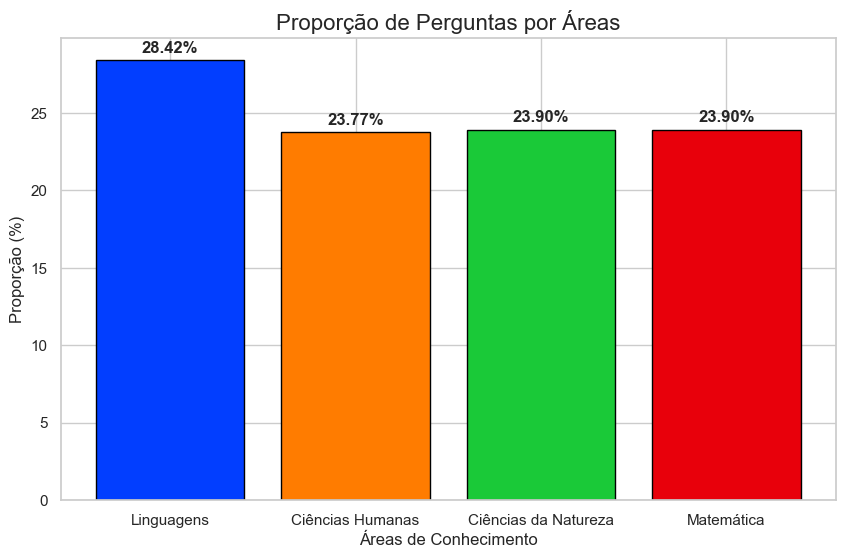

In [26]:
sns.set(style="whitegrid")

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Define uma paleta de cores vibrante
cores = sns.color_palette("bright")

# Plota o gráfico de barras com as porcentagens
plt.figure(figsize=(10, 6))
plt.bar(areas, questoes_area, color=cores, edgecolor='black')

# Adiciona rótulos aos eixos
plt.xlabel('Áreas de Conhecimento', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)

# Adiciona um título ao gráfico
plt.title('Proporção de Perguntas por Áreas', fontsize=16)

# Adiciona os valores em porcentagem em cima das barras
for i, v in enumerate(questoes_area):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

# Exibe o gráfico
plt.show()

In [27]:
def contador_falhas(coluna):
    falhas_area = []

    for area in areas:
        prob_quest = data[coluna][data["Area_de_Conhecimento"] == area]
        aux_qtd = (prob_quest == "possível imagem").sum()
        
        falhas_area.append(aux_qtd)

    return falhas_area


In [28]:
areas_busca = ["Enunciado", "Alternativa_A", "Alternativa_B", "Alternativa_C", "Alternativa_D", "Alternativa_E"]
erros_totais = []

for busca in areas_busca:
    erros_totais.append(contador_falhas(busca))

erros_totais = np.array(erros_totais).transpose()

KeyError: 'Enunciado'

In [ ]:
erros_totais

array([[ 0,  0,  4,  0,  6,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0, 14, 20, 18, 20, 12],
       [ 0, 38, 40, 38, 46, 34]], dtype=int64)

In [ ]:
areas[1] = 'Humanas'
areas[2] = "Natureza"
# Gambiarraaaaaaaaa favor não mexer

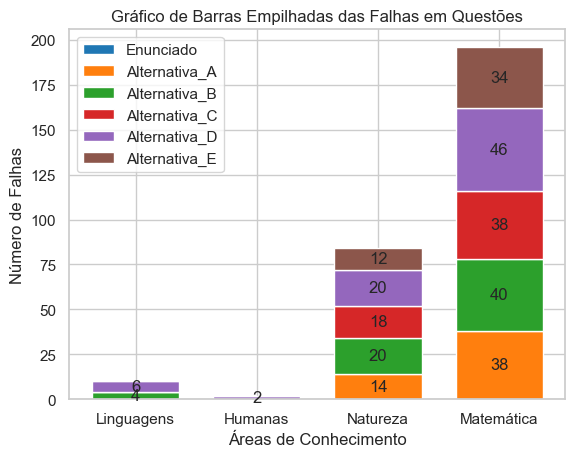

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dados = erros_totais

categorias = areas_busca
areas = areas

dados_transpostos = np.array(dados).T

n = len(areas)
bar_width = 0.72  # Largura das barras
indices = np.arange(n)

fig, ax = plt.subplots()

colors = plt.get_cmap('tab10').colors

bottoms = np.zeros(n)  # Inicializa o valor de base para empilhamento
for i, area in enumerate(categorias):
    bars = ax.bar(indices, dados_transpostos[i], bar_width, bottom=bottoms, label=area, color=colors[i % len(colors)])
    bottoms += dados_transpostos[i]  # Atualiza o valor de base para a próxima camada
    
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0: 
            ax.text(bar.get_x() + bar.get_width() / 2, bottoms[j] - height / 2,
                    f'{int(height)}', ha='center', va='center')

ax.set_xlabel('Áreas de Conhecimento')
ax.set_ylabel('Número de Falhas')
ax.set_title('Gráfico de Barras Empilhadas das Falhas em Questões')
ax.set_xticks(indices)
ax.set_xticklabels(areas)
ax.legend()

plt.show()
